In [122]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
mem = Memory("./mycache")

In [123]:
def get_data():
    data=load_svmlight_file('./Desktop/housing_scale')
    return data[0].todense(),data[1]
    
X,y=get_data()

y=np.reshape(y,(len(y),1))
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)#分割数据集

In [124]:
loss_train=[]
loss_test=[]
learning_rate = 0.001
(n,m) = np.shape(X_train)
X_train = np.hstack((X_train,np.ones((n,1))))
(n,m) = np.shape(X_test)
X_test = np.hstack((X_test,np.ones((n,1))))

w = np.zeros((m+1,1))

In [125]:
def loss(X,w,y):
    y_predict = X*w
    s = 0
    for i in range(0,len(y)):
        s=(s+(y_predict[i]-y[i])**2)
    return s/(2*len(y))

In [126]:
def gradient(X,w,y):
    grad = X.T*(X*w-y)
    return grad

100


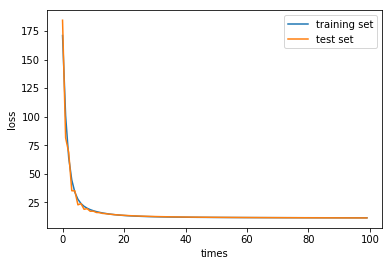

In [127]:
for i in range(100):
    grad = gradient(X_train,w,y_train)
    w=w-learning_rate*grad
    l_train = loss(X_train,w,y_train)
    l_test = loss(X_test,w,y_test)
    loss_train.append(l_train[0,0])
    loss_test.append(l_test[0,0])
print(len(loss_train))
plt.xlabel('times')
plt.ylabel('loss')
plt.plot(range(len(loss_train)),loss_train,label='training set')
plt.plot(range(len(loss_test)),loss_test,label='test set')
plt.legend()
plt.show()
    